# Analyzing Stock Price Trends of Major Banks Using Moving Averages

**Overview:**
The financial market encompasses a broad range of financial instruments and assets, with stocks being one of the primary components. Stocks, also known as equities, represent ownership shares in companies. Investors buy stocks for various reasons, including the potential for capital appreciation, dividends, and voting rights in company decisions.
Investors in the financial market rely on various strategies and analyses to make informed decisions. These include fundamental analysis (examining financial statements, earnings, and market conditions), technical analysis (analyzing stock price movements and patterns), and quantitative analysis (using statistical and mathematical models).

**The Goal:**
The primary aim of this project is to thoroughly investigate the stock performance of six prominent banks—Bank of America, Citigroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley, and Wells Fargo—over a decade. This analysis will focus on understanding the historical performance, volatility, and key factors influencing the stock prices of these financial institutions. The project seeks to uncover insights into how external economic events, internal financial health, and market trends impacted these banks' stock performances.

**Key objectives include:**

**Data Collection and Cleaning:**
- Gather historical stock price data for the six major banks from reliable financial databases.
- Clean and preprocess the data to handle missing values, ensure consistency, and prepare it for analysis.

**Exploratory Data Analysis (EDA):**
- Perform EDA to understand the distribution, trends, and anomalies in the stock price data.
- Visualize key metrics such as daily returns, moving averages, and trading volumes.

**Volatility and Performance Analysis:**
- Calculate and compare the volatility of each bank's stock to understand the risk associated with each.
- Analyze key performance indicators such as annual returns, maximum drawdown, and Sharpe ratios.

**Correlation and Relationship Analysis:**
- Examine the correlations between the stocks of these banks to understand their co-movements.
- Investigate the relationship between stock performance and external economic indicators such as interest rates, GDP growth, and inflation.

**Impact of Major Events:**
- Identify and analyze the impact of significant financial events (e.g., 2008 financial crisis, regulatory changes) on the stock performance of these banks.
- Use event study methodology to assess the immediate and long-term effects of these events on stock prices.

**Visualization and Reporting:**
- Create visualizations to effectively communicate the findings, including time-series plots, correlation heatmaps, and event impact charts.
- Compile a detailed report summarizing the analysis, insights, and conclusions drawn from the study.

Source: [Link to Data](https://www.google.com/finance/?hl=en)

In [50]:
# Importing the libraries I will use for this project

from pandas_datareader import data, wb
import pandas  as pd
import numpy as np
import datetime
%matplotlib inline

#Removing unwanted warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [52]:
# Getting stock data from Jan 1st 2006 to Jan 1st 2016 for each bank
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [54]:
# Creating ticker symbols

# Bank of America
BAC = data.DataReader('BAC', 'stooq', start, end)
# CitiGroup
C = data.DataReader('C', 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'stooq', start, end)

In [55]:
# # Reading in the data
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
bank_stocks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04  38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05  38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06  38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09  38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

                                   
              Close        Volume  
Date                               
2006-01-03  22.9581  1.530724e+07  
2006-01-04  22.6917  1.510382e+07  
2006-01-05  22.6690  1.407726e+07  
2006-01-06  22.7983  1.167705e+07  
2006-01-09  22.7983  7.808415e+06  

[5 rows x 30 columns]

In [56]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

**Exploratory Data Analysis (EDA)**

In [59]:
# Max close price for each bank's stock throughout the time period
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

In [63]:
# Creating a dataframe that will contain the percent returns for each bank's stock
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


**Creating Pairplot of data**

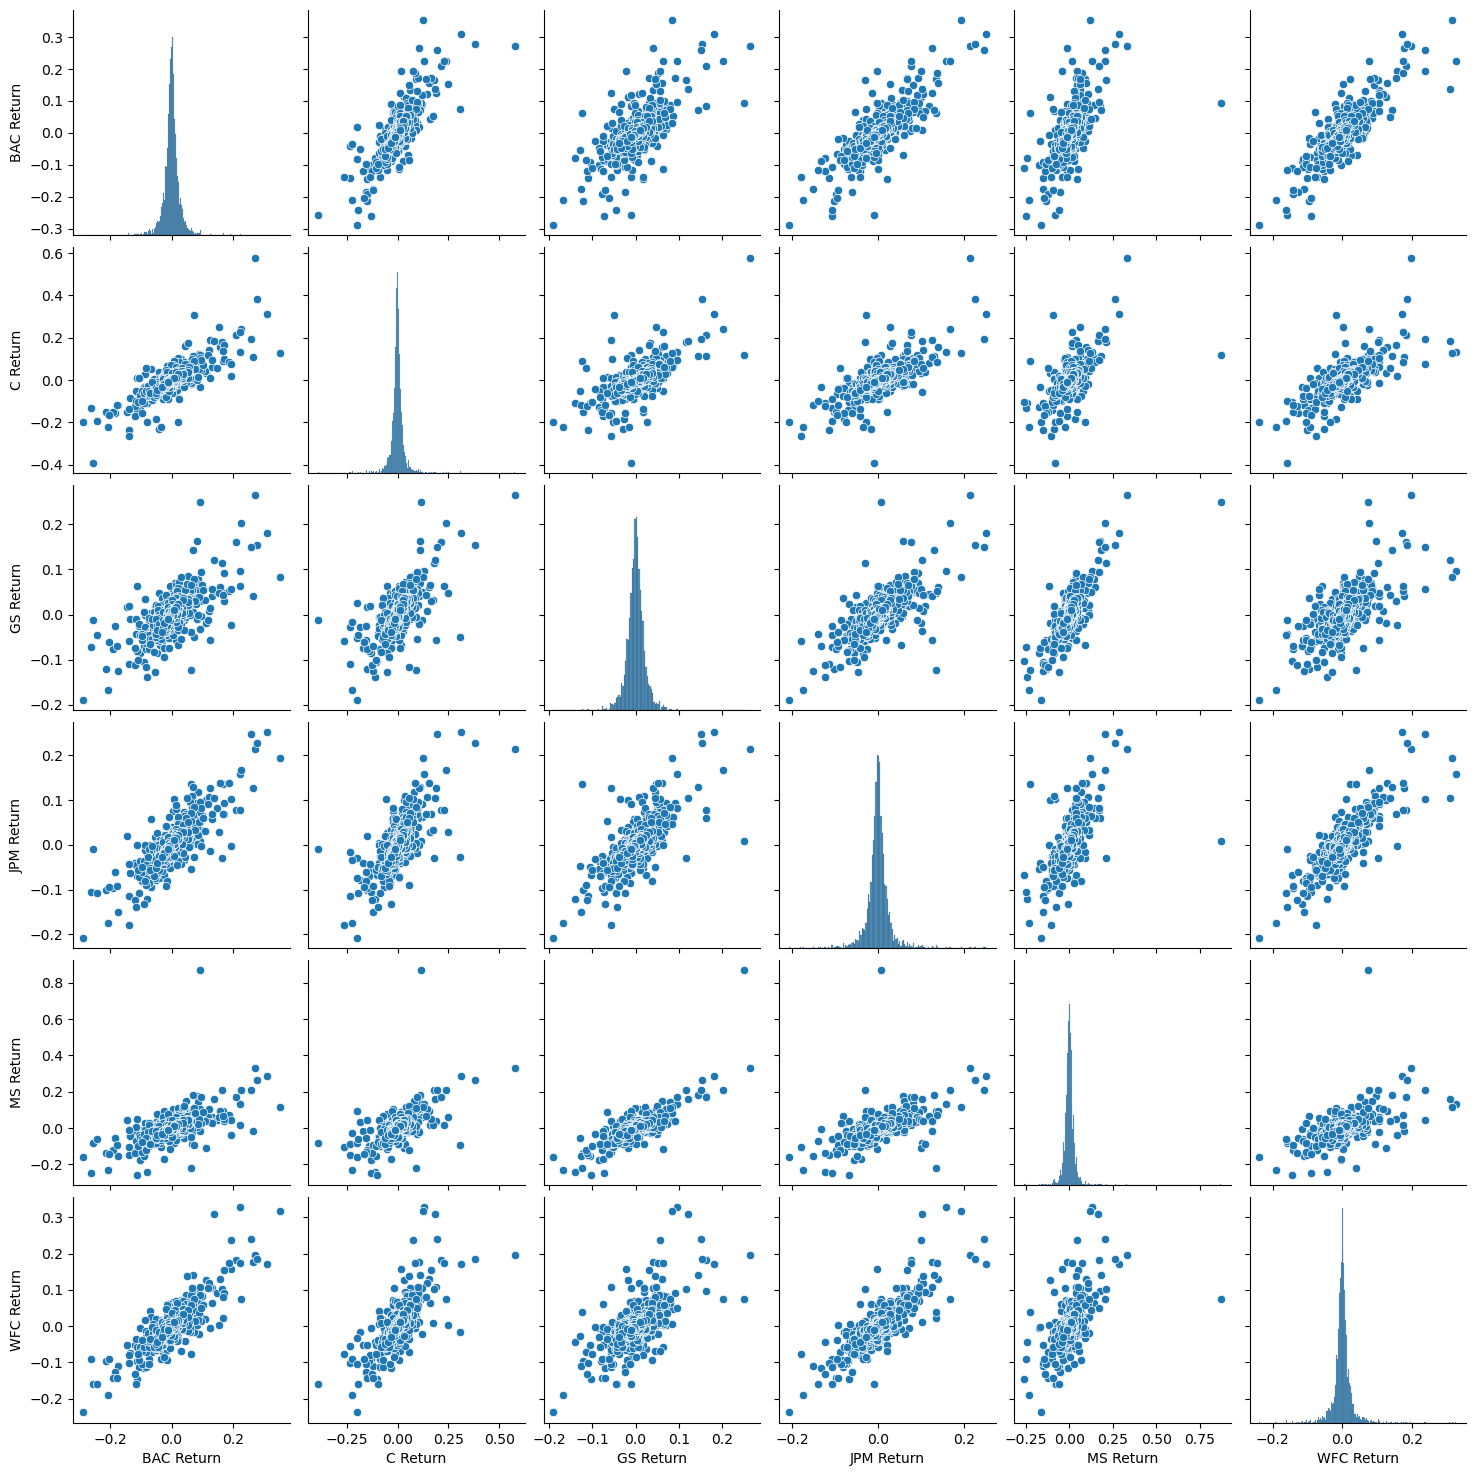

In [66]:
# Creating a Pairplot of the data 
import seaborn as sns

sns.pairplot(returns[1:])

In [77]:
# What dates each bank stock had the best and worst single day returns
min_index = returns.idxmin()
max_index = returns.idxmax()

min_index

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [79]:
max_index

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [81]:
# Looking at the standard deviation of the returns, which look to be the riskiest
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [83]:
# Looking at the standard deviation of the returns, which look to be the riskiest in 2015
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

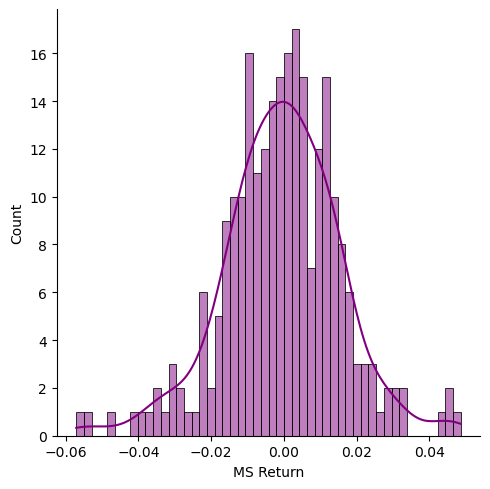

In [135]:
# Distplot of 2015 returns for Morgan Stanley
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color = 'purple',
             bins=50, kde=True)

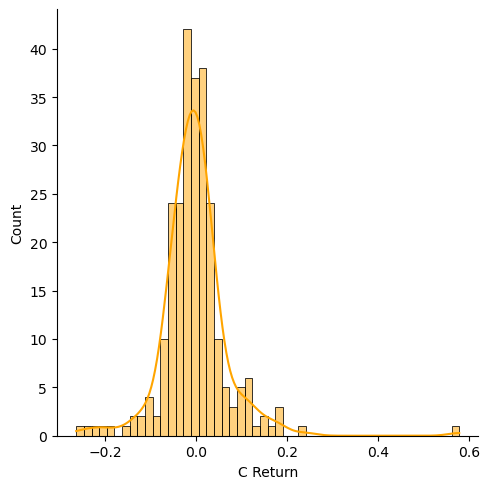

In [139]:
# Distplot of 2008 returns for CitiGroup
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color = 'orange',
             bins=50, kde=True)

## More visualization

In [141]:
# Importing the libraries I will use for more visualizations

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

<Axes: xlabel='Date'>

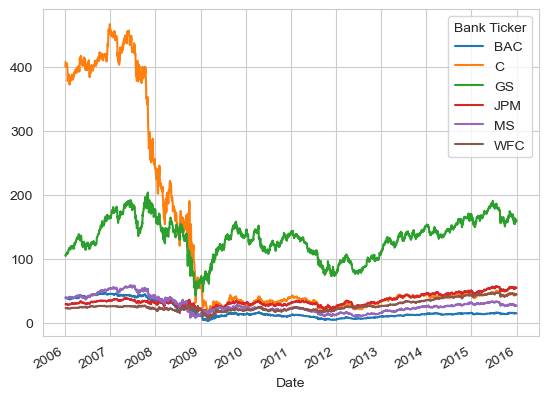

In [143]:
# Line plot showing close price for each bank for the entire index of time
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()

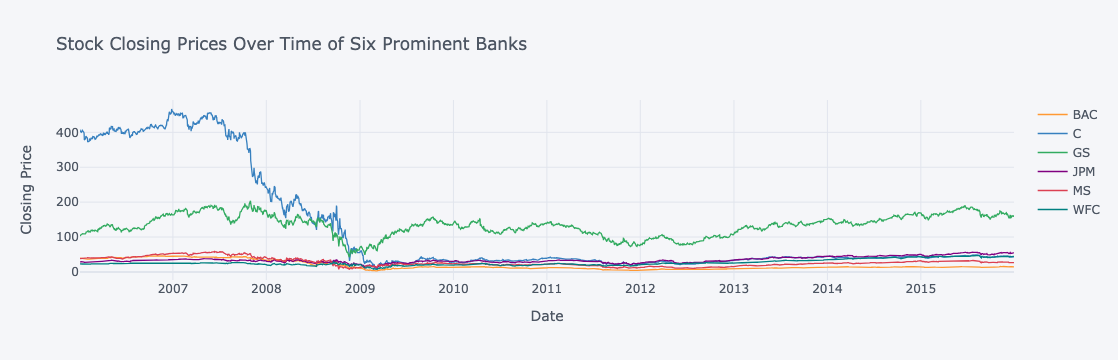

In [169]:
# Create a plot with interactive features
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot(title='Stock Closing Prices Over Time of Six Prominent Banks',
    xTitle='Date',
    yTitle='Closing Price')

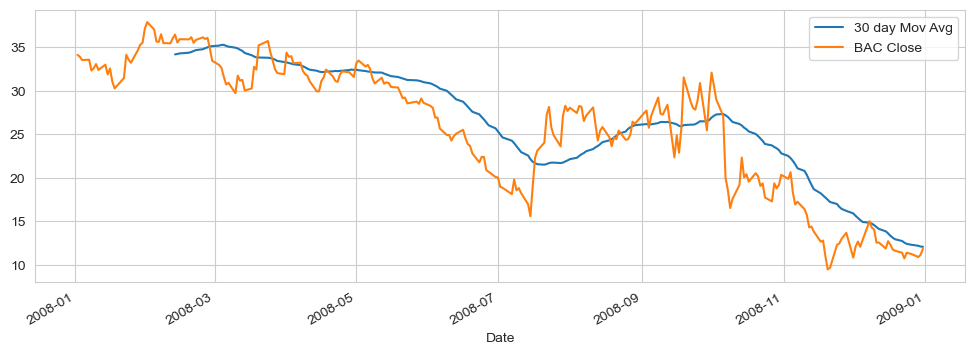

In [147]:
# Moving averages in 2008 for Bank of America
BAC.index = pd.to_datetime(BAC.index)
BAC = BAC.sort_index()

plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

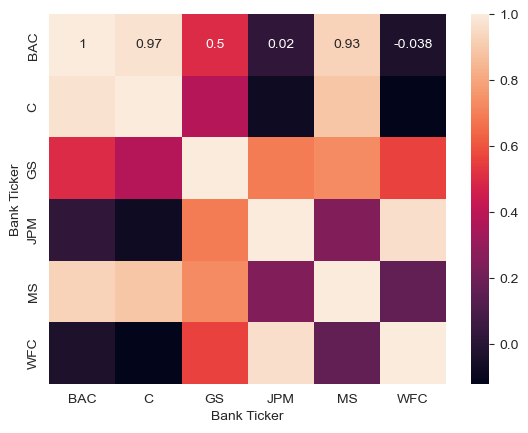

In [149]:
# Heatmap of the correlation between the stocks Close Price
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

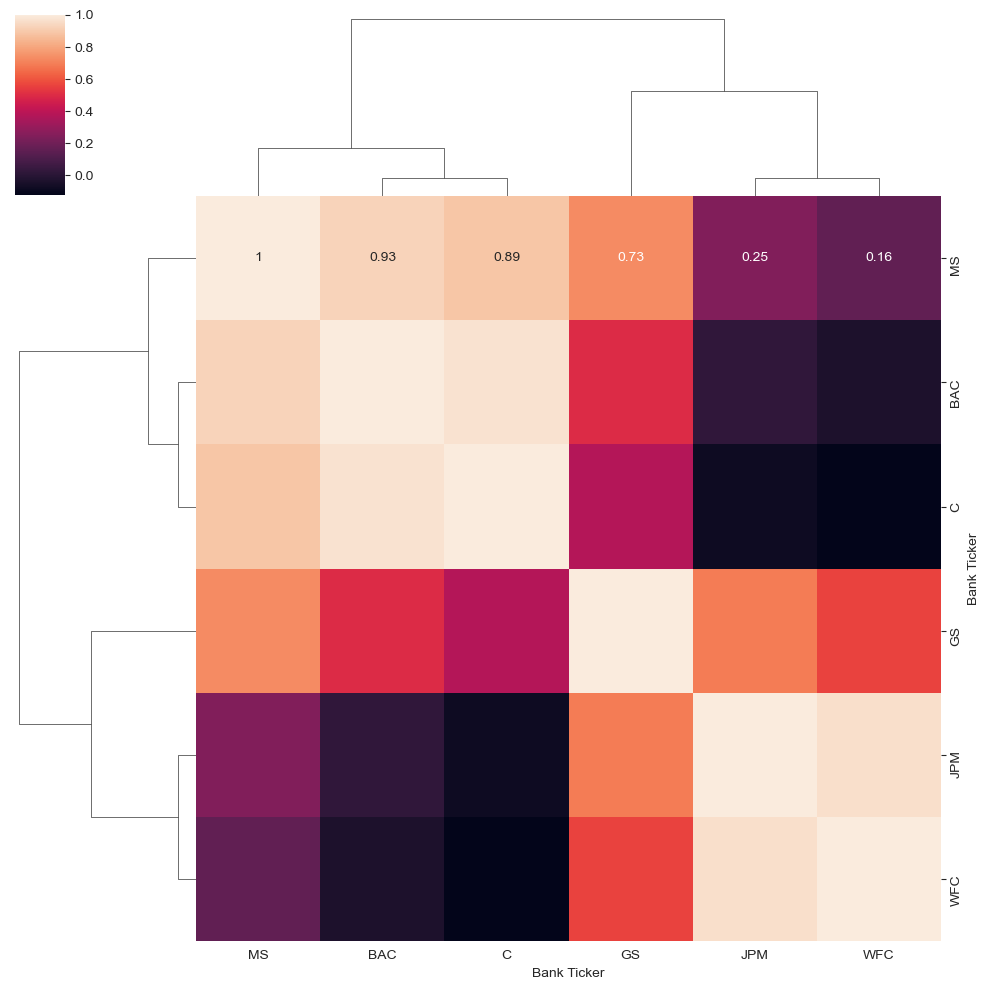

In [151]:
# Using clustermap to cluster the correlations together
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

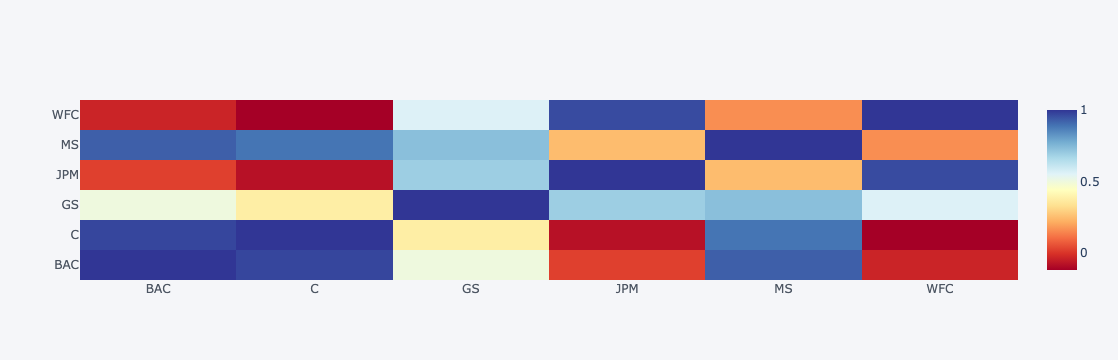

In [155]:
# Create an interactive clustermap to cluster the correlations together and change the colours
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

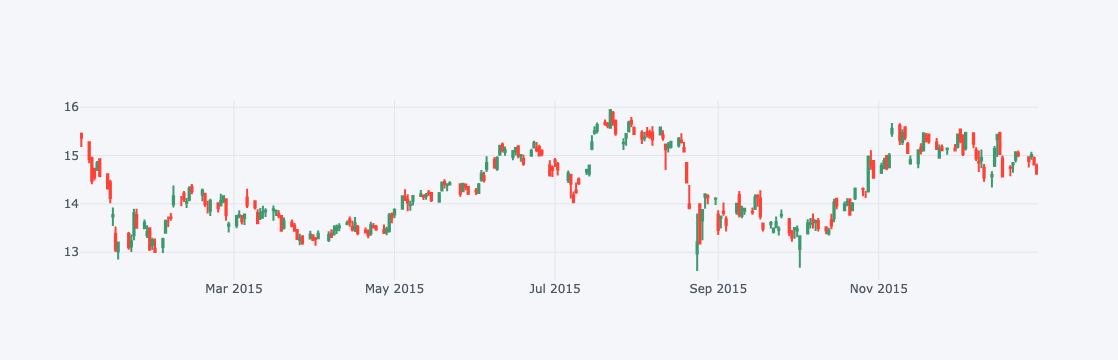

In [157]:
# Creating a candle plot of BAC from Jan 1st 2015 to Jan 1st 2016
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

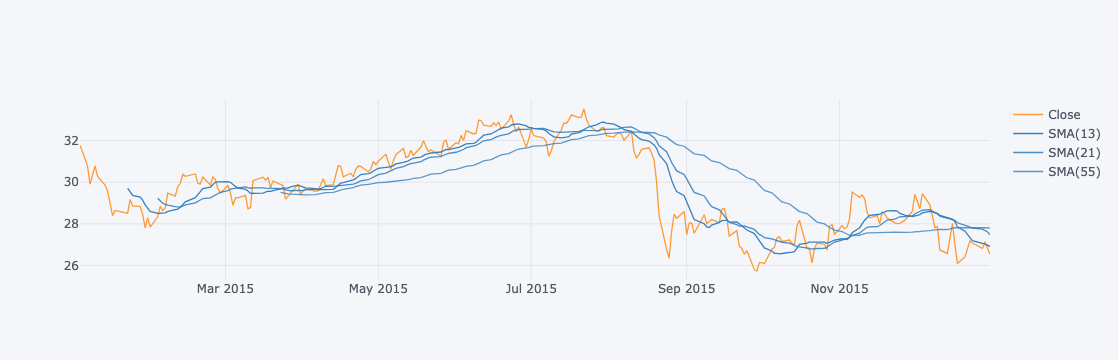

In [159]:
# Simple Moving Averages plot of Morgan Stanley for the year 2015
MS2 = MS.sort_index()
MS2['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods = [13,21,55])

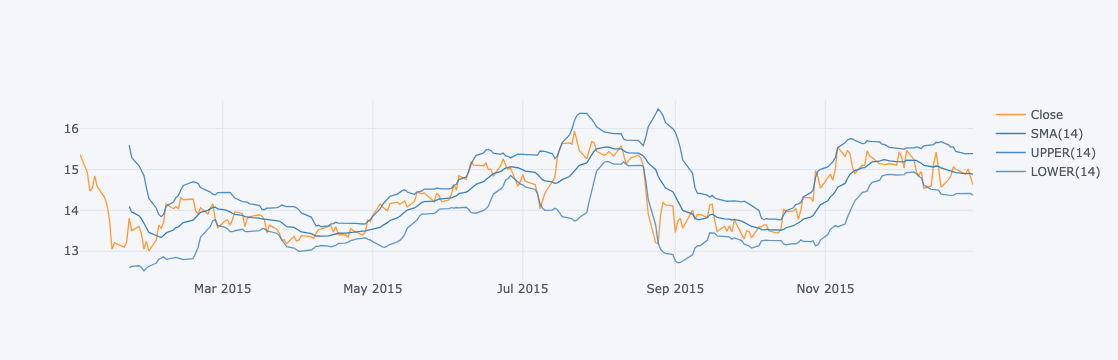

In [161]:
# Bollinger Band Plot for BAC for the year 2015
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Conclusion:
The comprehensive analysis of the stock performance of six prominent banks—Bank of America, Citigroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley, and Wells Fargo—over a decade revealed significant insights into their historical performance, volatility, and response to key economic events.

**Stock Price Trends:**

The stock prices of all six banks showed substantial fluctuations over the analyzed period. Notably, there were significant drops during the 2008 financial crisis, followed by periods of recovery and further fluctuations.
**Volatility Analysis:**

By calculating the standard deviation of returns, it was evident that the financial crisis period had the highest volatility. For instance, the 2008 data showed extreme values for single-day returns, highlighting the instability during that time.
The standard deviation of returns in 2015 indicated that Morgan Stanley had the highest volatility among the banks, suggesting it was the riskiest stock to invest in during that year.
**Moving Averages and Bollinger Bands:**

The moving averages and Bollinger Bands plots for Bank of America and Morgan Stanley indicated trends and potential price reversals. These technical analysis tools were useful in identifying periods of high and low volatility and potential entry and exit points for traders.
**Correlation Analysis:**

The heatmaps and cluster maps illustrated the correlation between the stock prices of these banks. For instance, there was a high correlation between Citigroup and Bank of America, suggesting that their stock prices tended to move together.
The cluster maps helped to visually group banks with similar stock price movements, providing insights into how closely these financial institutions were related in terms of market performance.
**Impact of Major Events:**

Significant financial events, such as the 2008 financial crisis, had a profound impact on the stock prices of these banks. The event study methodology showed the immediate and long-term effects, with notable drops in stock prices during the crisis and varied recovery periods.
**Future Recommendations:**
**Risk Management:**

Investors should use volatility metrics and correlation analysis to manage risk effectively. Diversifying investments across less correlated stocks can help mitigate risk.
**Technical Analysis Tools:**

Utilizing technical analysis tools like moving averages and Bollinger Bands can aid in making informed trading decisions by identifying trends and potential price reversals.
**Continuous Monitoring:**

Regularly monitoring stock performance and external economic indicators is crucial for making timely investment decisions. The use of interactive and dynamic visualizations can enhance this process.
By understanding the historical performance and volatility of these banks, investors can better strategize their investments and anticipate market movements. The analysis underscores the importance of comprehensive data analysis and visualization in making informed financial decisions.